<h3> Nama : Gulfi Oktariani </h3>
<h3> Nim  : 09011381823118</h3> 

## Support Vector Machine
Menggunakan dataset students performance

## Tahapan dalam klasifikasi 
1. Menemukan data
2. Menerapkan model data science, pada kasus ini digunakan SVM (menggunakan kernel "linear")
3. Meninjau ulang hasil

Refrensi dataset : https://www.kaggle.com/spscientist/students-performance-in-exams

STEP 1.IMPORT LIBRARIES

In [1]:
# Packages for analysis
import pandas as pd
import numpy as np
from sklearn import svm

# Packages for visuals
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)

# Allows charts to appear in the notebook
%matplotlib inline

# Pickle package
import pickle

STEP 2.IMPORT DATA

In [2]:
sp = pd.read_csv('StudentsPerformance.csv')
# To display the top 5 rows
sp.head(5)

FileNotFoundError: [Errno 2] File b'StudentsPerformance.csv' does not exist: b'StudentsPerformance.csv'

STEP 3.PERSIAPAN DATA

In [ ]:
# Plot two ingredients
sns.lmplot('reading score', 'writing score', data=sp, hue='gender',palette='Set1', fit_reg=False, scatter_kws={"s": 70});

In [ ]:
# Specify inputs for the model
# ingredients = sp[['race/ ethnicity','parental level of education','lunch', 'test preparation course','math score','reading score','writing score']].as_matrix()
ingredients = sp[['reading score','writing score']].as_matrix()
type_label = np.where(sp['gender']=='female', 0, 1)

# Feature names
sp_features = sp.columns.values[1:].tolist()
sp_features

STEP 4. FIT MODEL

In [ ]:
# Fit the SVM model
model = svm.SVC(kernel='linear') #menggunakan kernel linear
X = sp[['reading score','writing score']]
y = sp['gender']
model.fit (X,y)

STEP 5. VISUALISASI HASIL

In [ ]:
# Get the separating hyperplane
w = model.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(30, 60)
yy = a * xx - (model.intercept_[0]) / w[1]

# Plot the parallels to the separating hyperplane that pass through the support vectors
b = model.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = model.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

In [ ]:
colors = {'female' : 'b', 'male': 'r'}
plt.scatter(sp['reading score'], sp['writing score'],c=[colors[r] for r in sp['gender']])

ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx = np.linspace(xlim[0], xlim[1],30)
yy = np.linspace(ylim[0], ylim[1],30)
XX,YY = np.meshgrid(xx,yy)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = model.decision_function(xy).reshape(XX.shape)
                 
ax.contour(XX,YY,Z, colors='k', levels=[-1,0,1], alpha=0.5, linestyles=['--','-','--'])
ax.set_title('Students Performance')
ax.set_xlabel('Reading Score')
ax.set_ylabel('Writing Score')

Garis tengah dinamakan garis Hyperplane yang akan membantu dalam menghitung jarak dan memisahkan klasifikasi dari 2 type.

In [ ]:
model.predict([[57,44]])

In [ ]:
model.predict([[90,88]])

STEP 6. PREDIKSI KASUS BARU

In [ ]:
# Create a function to guess when a students is a famale or male
def female_or_male(reading,writing):
    if(model.predict([[reading, writing]]))==0:
        print('female students!')
    else:
        print('male students!')
        
# Predict if 57 reading score and 44 writing score
female_or_male(57, 44)

In [ ]:
# Plot the point to visually see where the point lies
sns.lmplot('reading score', 'writing score', data=sp, hue='gender', palette='Set1', fit_reg=False, scatter_kws={"s": 60})
plt.plot(xx, yy, linewidth=2, color='k')
plt.plot(57,44, 'yo', markersize='10');

## Pairplot 
Fungsi ini dapat menggambarkan grafik kombinasi (n,2) dari setiap peubah data dalam bentuk matriks, dengan diagonal utamanya merupakan representasi grafis dari data univariat.

Hue merupakan Pembedaan warna untuk aspek - aspek tertentu dalam data.

In [ ]:
import seaborn as sn
sn.pairplot(sp,hue='gender')

## Train Test Splits
Train test split digunakan untuk memecah data X dan Y ke dalam data untuk training dan data untuk testing. Tujuannya adalah untuk memvalidasi model agar tidak mengukur sampel yang sama dengan data yang digunakan untuk fitting. 

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(X,y, test_size=0.6, random_state=5, shuffle=True)
model.fit(x_train, y_train)

In [ ]:
y1_pred=model.predict(x_test)

from sklearn.metrics import accuracy_score
accuracy_score(y1_pred, y_test)

Keterangan : accuracy_score untuk melihat akurasi hasil prediksi

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y1_pred, y_test)

Keterangan :
Confusion matrix adalah suatu metode yang biasanya digunakan untuk melakukan perhitungan akurasi pada konsep data mining atau Sistem Pendukung Keputusan. Pada pengukuran kinerja menggunakan confusion matrix, terdapat 4 (empat) istilah sebagai representasi hasil proses klasifikasi. Keempat istilah tersebut adalah 
True Positive (TP), 
True Negative (TN), 
False Positive (FP) dan 
False Negative (FN). 
Nilai True Negative (TN) merupakan jumlah data negatif yang terdeteksi dengan benar, sedangkan False Positive (FP) merupakan data negatif namun terdeteksi sebagai data positif. Sementara itu, True Positive (TP) merupakan data positif yang terdeteksi benar. False Negative (FN) merupakan kebalikan dari True Positive, sehingga data posifit, namun terdeteksi sebagai data negatif.


## Penjelasan 
Support vector machine (SVM) merupakan salah satu dari supervised machine learning yang digunakan untuk mengklasifikasi data.

Pada klasifikasi students performance dataset ini menggunakan kernel "linear" dari support vector machine.

Model yang umum digunakan untuk menyelesaikan masalah klasifikasi dan
regresi adalah model linear, yaitu model yang merupakan kombinasi linear
dari fungsi basis:
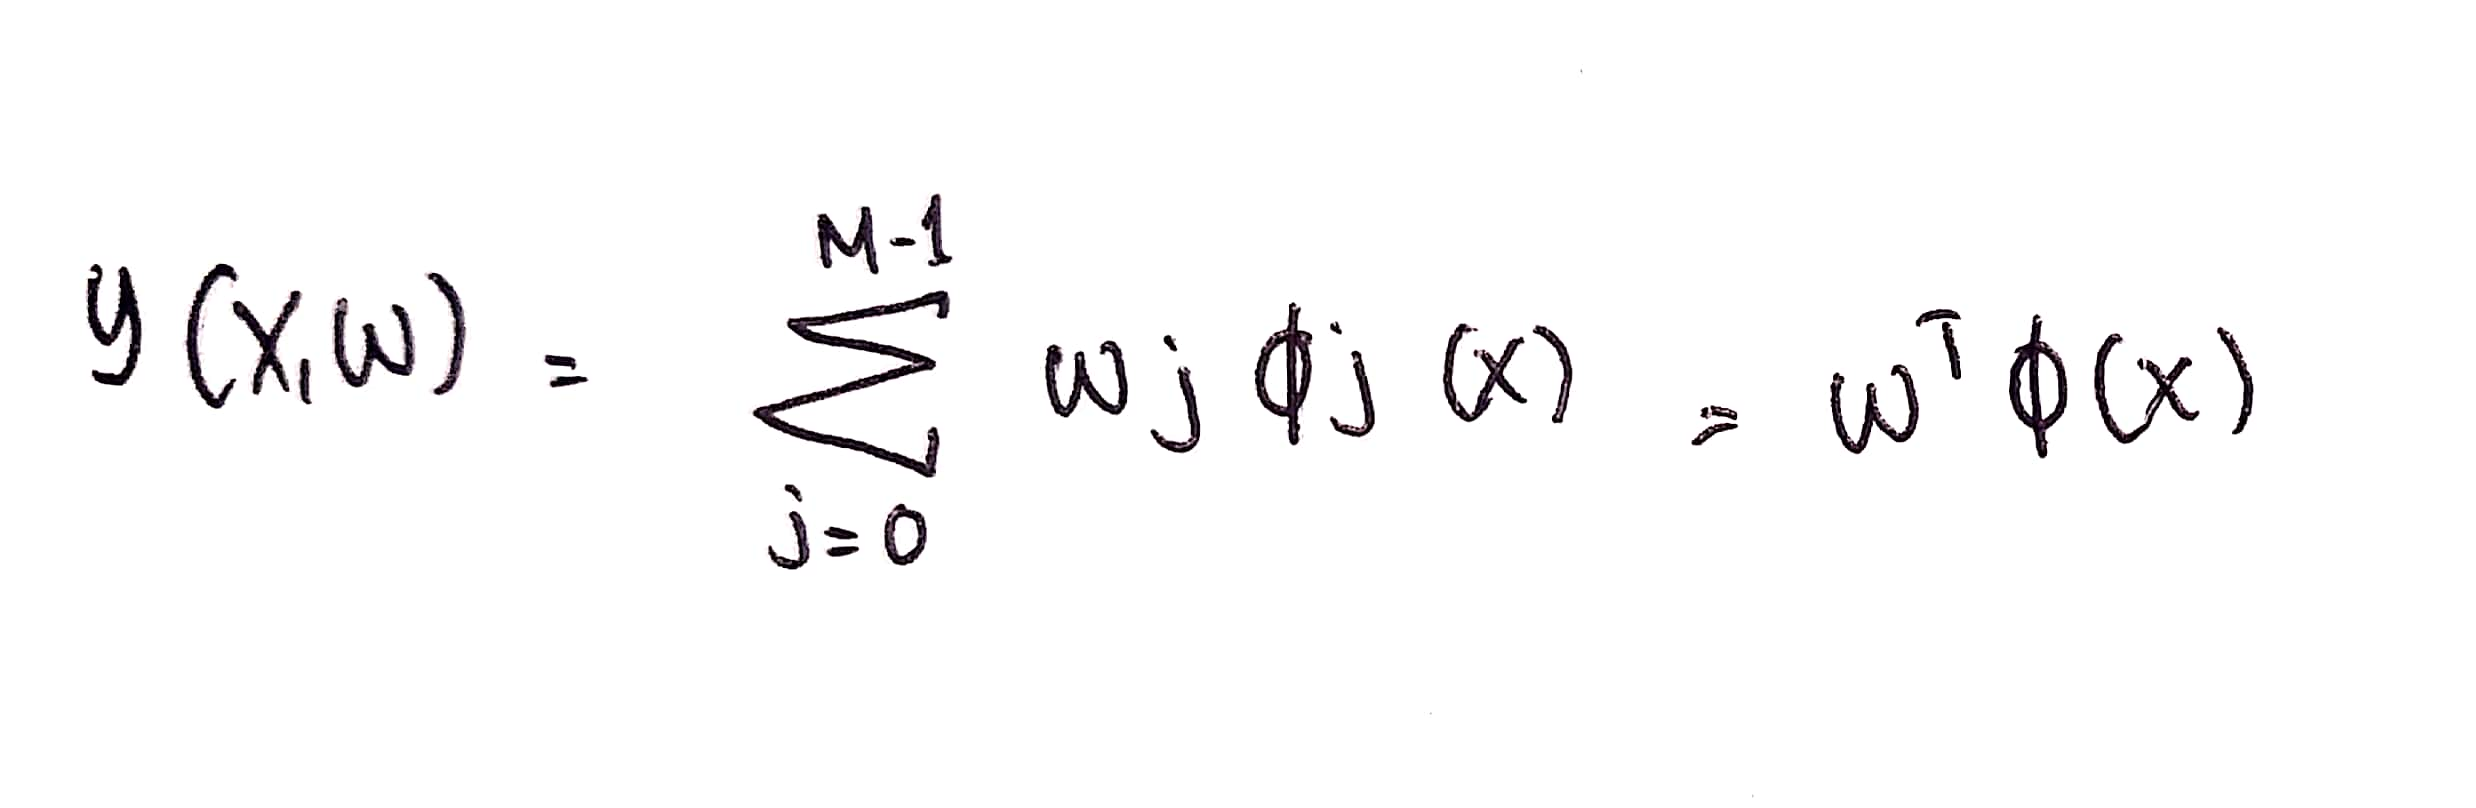


Untuk menyelesaikan pemrograman kuadrat tersebut, cara yang
umum digunakan adalah mencari bentuk dual dengan menggunakan
perkalian Lagrange (Lagrange multipliers) an≥0, dengan satu pengali
Lagrange untuk setiap kendala, untuk membentuk fungsi Lagrangian
(Lagrangian function) sbb:
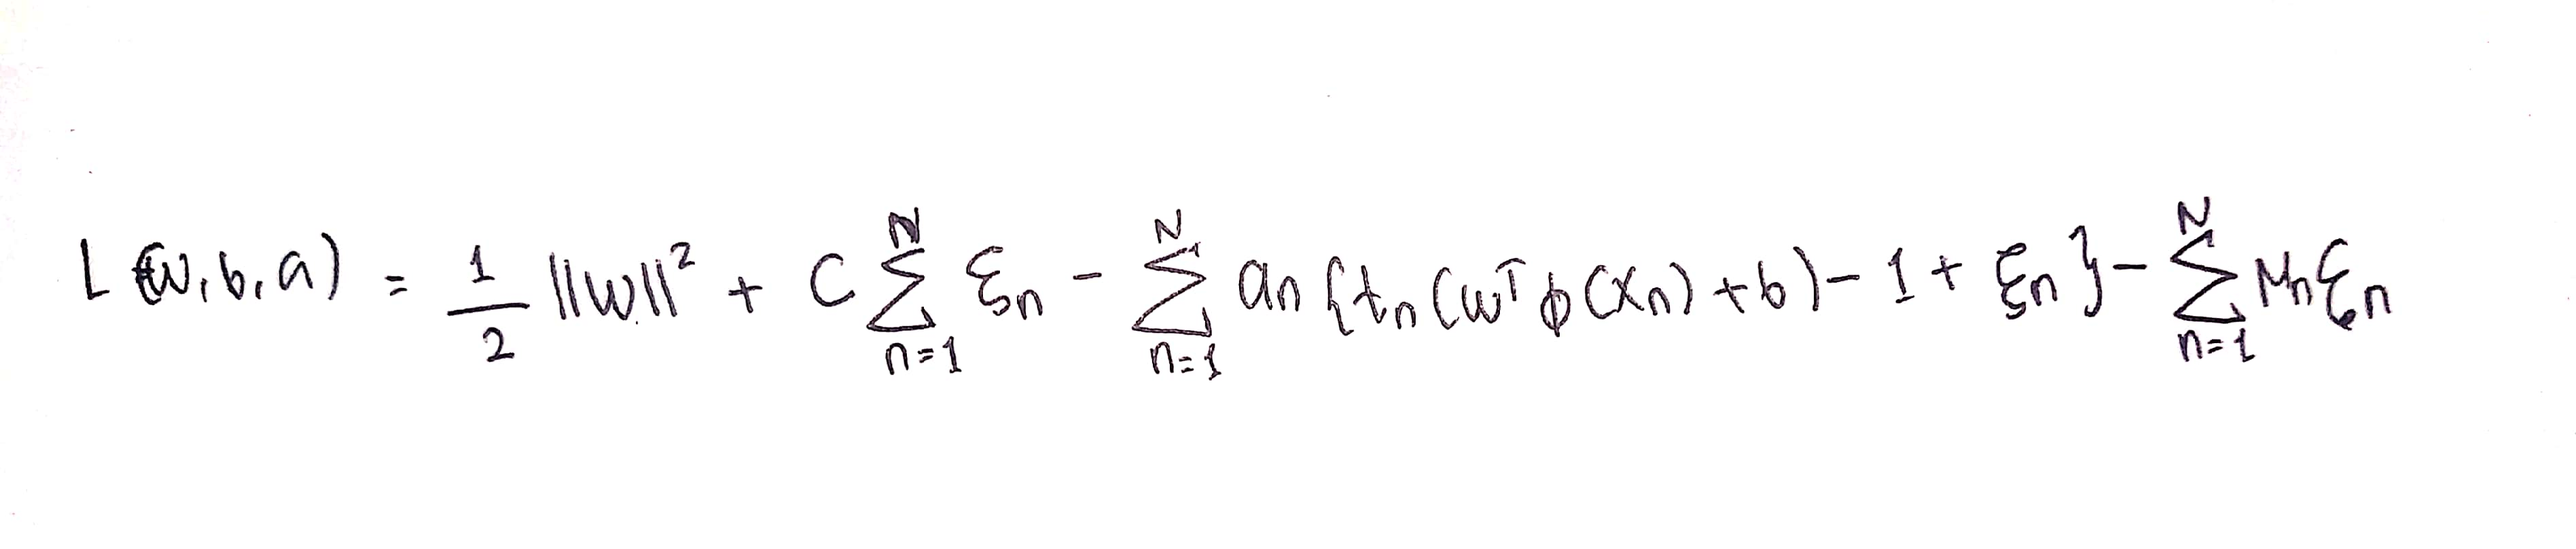

Dengan menurunkan L(w, b, a) terhadap w dan b sama dengan nol,
maka :
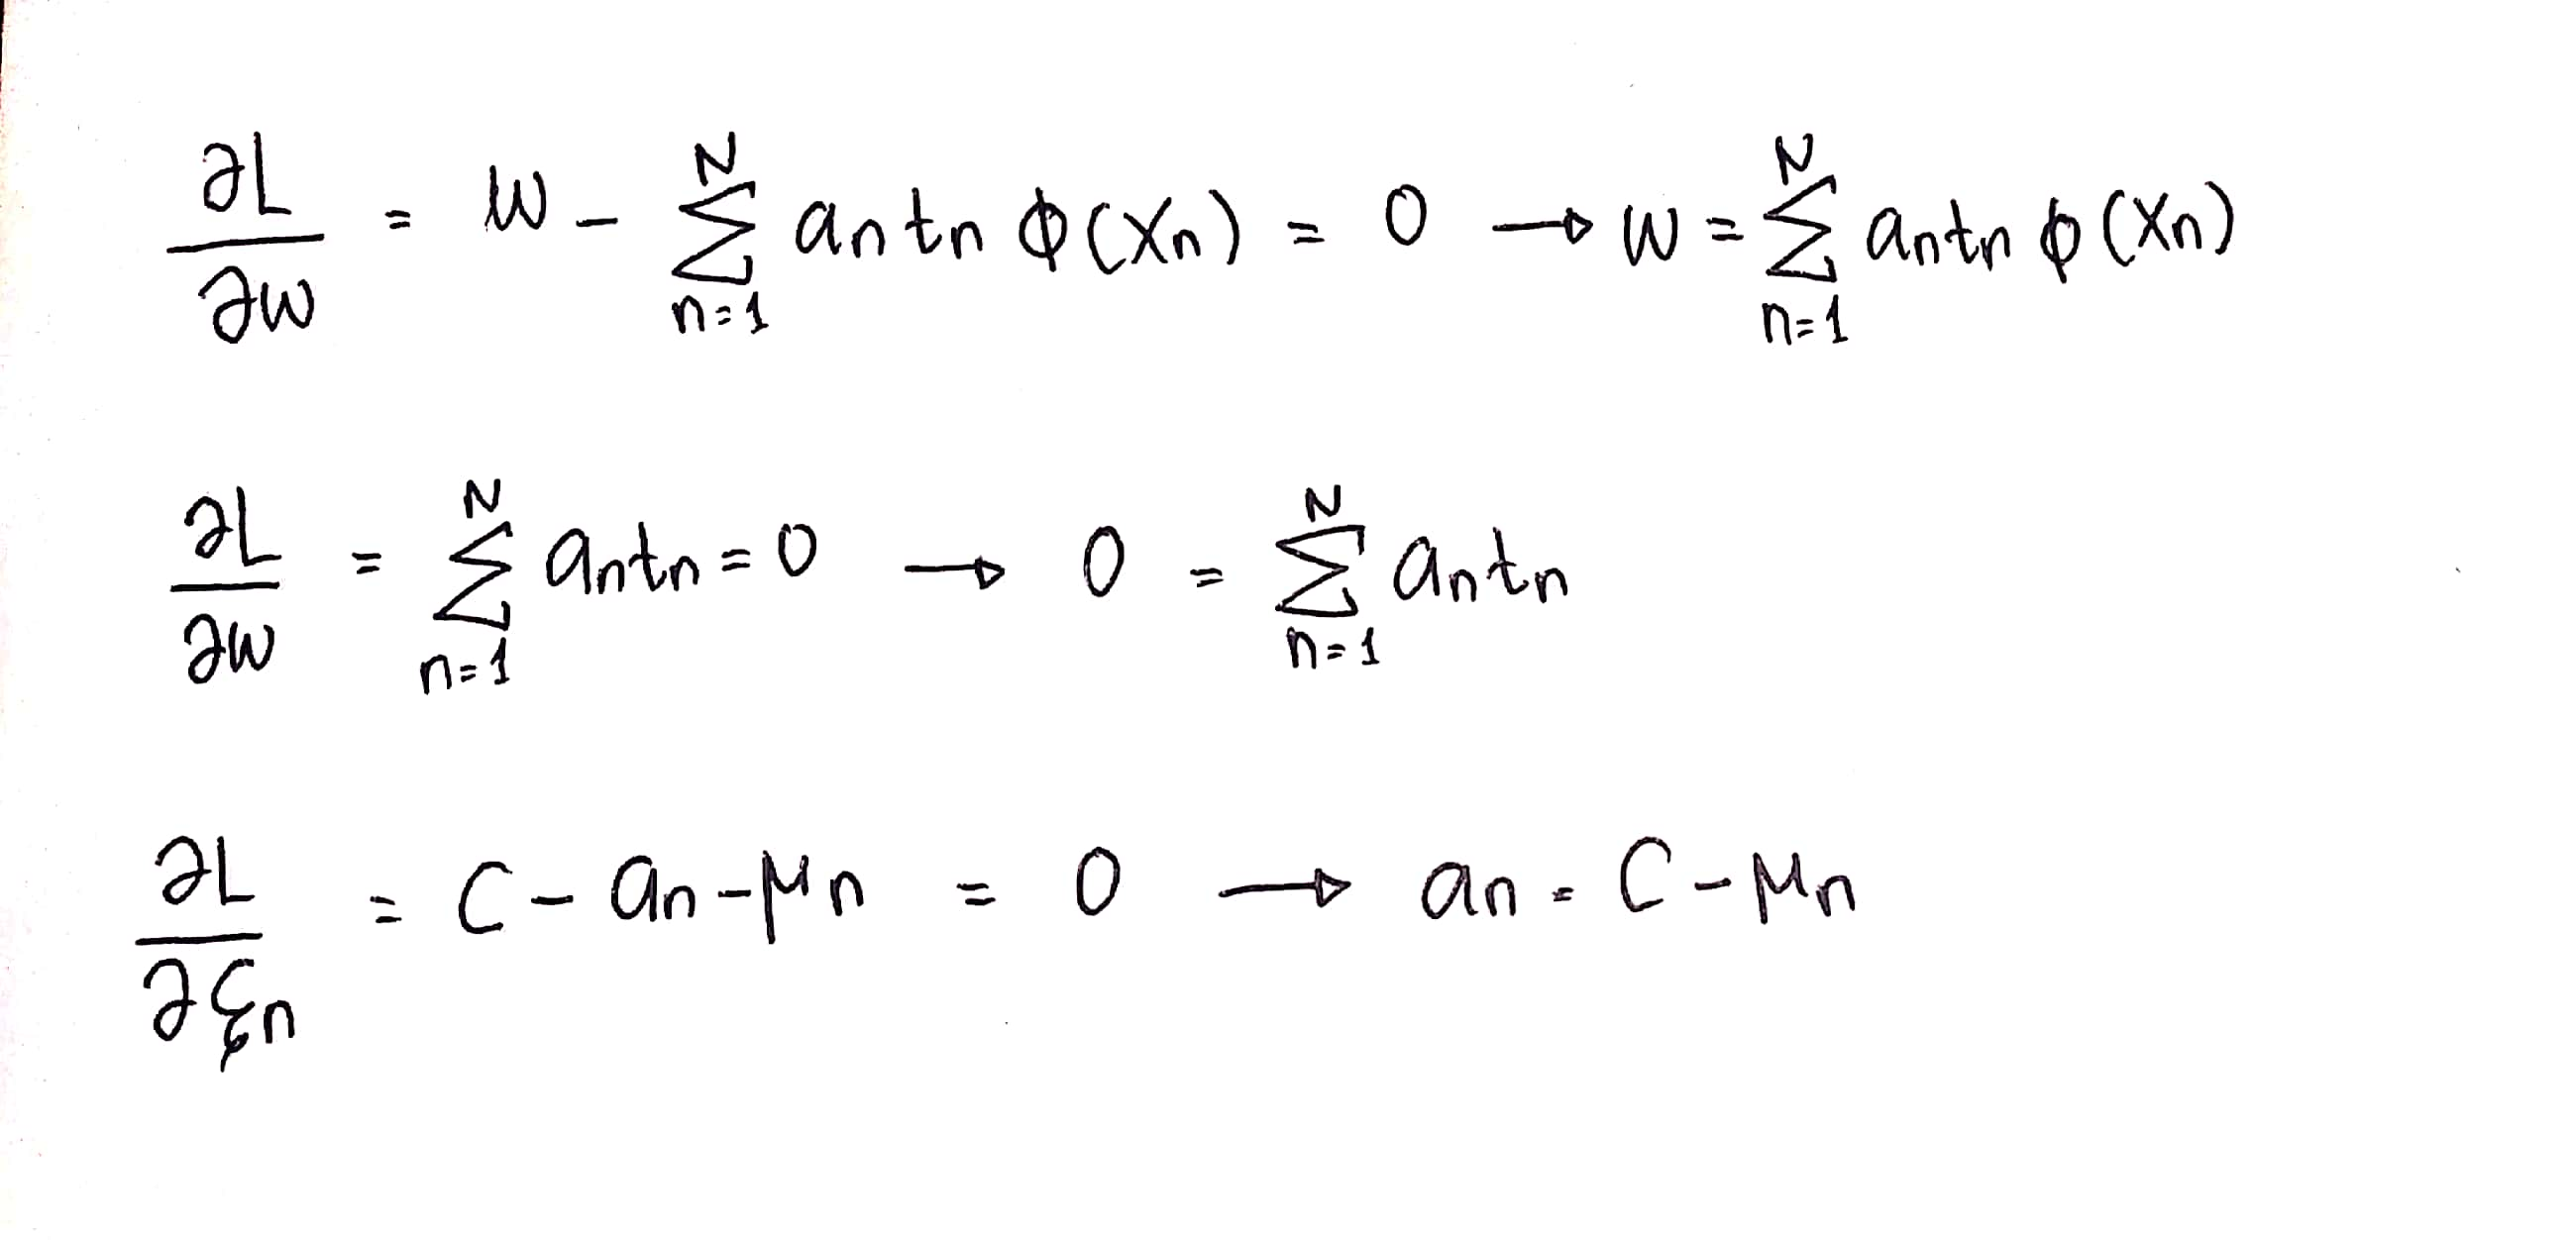